In [1]:
import numpy as np
from matplotlib import cm
import numpy as np
import os
import matplotlib.pyplot as plt
from lib import utils
from lib.get_manifold import get_color
import torch
def standard_fig_save(save_path=r"D:\projects\SF\toy_example\results\drawings", file_name="test", file_format="png"):
    # don't need to set format
    fig_filename = os.path.join(save_path, file_name + '.' + file_format)
    utils.makedirs(os.path.dirname(fig_filename))
    plt.savefig(fig_filename, dpi=500, bbox_inches='tight', transparent=True, pad_inches=0)
    plt.close()


# 全局设置 pdfa字体
# plt.rcParams['ps.useafm'] = True
# plt.rcParams['pdf.use14corefonts'] = True
# plt.rcParams['text.usetex'] = True

# 全局设置times new roman字体
params={'font.family':'serif',
        'font.serif':'Times New Roman',
#         'font.style':'italic',
        'font.weight':'normal', #or 'blod'
        'font.size':20,#or large,small
        }
plt.rcParams.update(params)

label_font_s = 35
tick_font_s = 30
legend_font_s = 30
linewidth = 1

maps = ['viridis', 'plasma', 'inferno', 'magma', 'cividis', 'Greys', 'Purples', 'Blues', 'Greens', 
        'Oranges', 'Reds','YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu','GnBu', 'PuBu', 
        'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']

In [2]:
a = ['YC01_rel', 'YC02_rel', "DDH_left", "DDH_right"]
b = ['nflow', 'MLLE', 'Isomap', 'T-SNE', 'UMAP', 'HLLE', 'LTSA', 'LLE', 'WLLE']
name = a[1]
data_path = r"D:\projects\Datasets\Embeddings\nflow\{}_MF.csv".format(name)
ori_path = r"D:\projects\Datasets\Original\{}.csv".format(name)

In [3]:
c = get_color("YC02_rel")

In [4]:
data_id = 5
data_path = r"D:\projects\SF\toy_example\results\YC02_rel\asd\YC02_rel_{}.csv".format(data_id)

data = np.loadtxt(fname=data_path, delimiter=",")

In [5]:
from scipy.spatial.distance import cdist
z = data
Dis = cdist(z, z, p=2)  # distance matrix
m = Dis.mean()

# 不带权A
A = np.eye(Dis.shape[0])
# A[Dis < self.varrho] = 1
A[Dis < m] = 1
remain_persent = (A.sum() / (A.shape[0] * A.shape[1])).item()
print("Sparsity of A(0 is empty):", remain_persent * 100, "%")

Sparsity of A(0 is empty): 53.88260977140826 %


<Figure size 432x288 with 0 Axes>

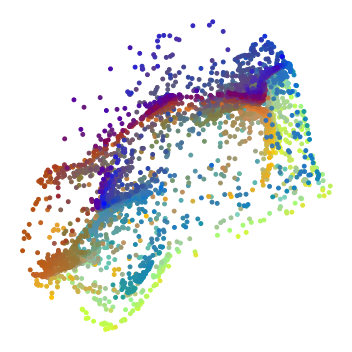

In [6]:
x = data[:, 0]
y = data[:, 1]
plt. clf()
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5), tight_layout=True)
plt.axis('off')

ax.scatter(x, y, s=15, c=c, marker='o', cmap=maps[1], alpha=1)
plt.savefig(r"D:\projects\SF\toy_example\results\局部邻接矩阵\{}.pdf".format(data_id), dpi=500, bbox_inches='tight', pad_inches=0)
plt.show()

选择局部的点,并构造邻接矩阵

In [7]:
# 记录 idx 在第三维
idx = np.arange(data.shape[0]).reshape(-1, 1)
iddata = np.concatenate((data, idx), 1)

In [8]:
n = 10

x_max = data[:, 0].max()
x_min = data[:, 0].min()
y_max = data[:, 1].max()
y_min = data[:, 1].min()
x_in = (x_max - x_min) / n
y_in = (y_max - y_min) / n
x_list = np.arange(x_min, x_max, x_in)
y_list = np.arange(y_min, y_max, y_in)

In [9]:
# 全体分块
for i in range(n):
    for j in range(n):
        temp = iddata
        temp = temp[x_list[i] < temp[:, 0]]
        if i < n - 1: temp = temp[temp[:, 0] < x_list[i + 1]]
        temp = temp[y_list[j] < temp[:, 1]]
        if j < n - 1: temp = temp[temp[:, 1] < y_list[j + 1]]
        
        if temp.shape[0] > 100 and temp.shape[0]< 300:
            break
    if temp.shape[0] > 100:
        break

In [10]:
# 选择坐标 ij 的块
i, j = 3, 5
temp = iddata
temp = temp[x_list[i] < temp[:, 0]]
if i < n - 1: temp = temp[temp[:, 0] < x_list[i + 1]]
temp = temp[y_list[j] < temp[:, 1]]
if j < n - 1: temp = temp[temp[:, 1] < y_list[j + 1]]
temp.shape[0]

57

In [11]:
# 获取选择出来的点的ID, 非常重要
crop = temp[:, 2]

In [12]:
# 从原始数据中截取ID list
li = []
c_list = []
for i in crop:
    li.append(data[int(i), :])
    c_list.append(c[int(i), :])
selected = np.array(li)

# 计算邻接矩阵
Dis = cdist(selected, selected, p=2)  # distance matrix

A = np.eye(Dis.shape[0])
# A[Dis < self.varrho] = 1
m = Dis.mean()
A[Dis < m] = 1

remain_persent = (A.sum() / (A.shape[0] * A.shape[1])).item()
print("Sparsity of A(0 is empty):", remain_persent * 100, "%")

Sparsity of A(0 is empty): 54.07817790089259 %


<Figure size 432x288 with 0 Axes>

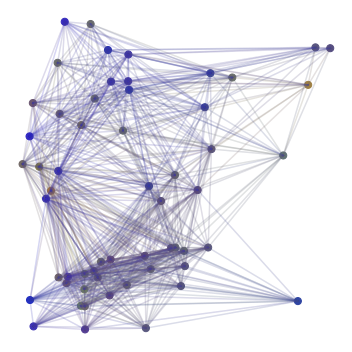

In [13]:
# 画图和邻接矩阵
Adj = A
x = selected[:, 0]
y = selected[:, 1]
plt. clf()
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5), tight_layout=True)
plt.axis('off')

ax.scatter(x, y, s=50, c=c_list, marker='o', cmap=maps[1], alpha=1)

for i in range(Adj.shape[0]):
    for j in range(Adj.shape[1]):
        if Adj[i][j] == 1:
            plt.plot([x[i], x[j]], [y[i], y[j]], color=c_list[i], alpha=0.1)
plt.savefig(r"D:\projects\SF\toy_example\results\局部邻接矩阵\{}_adj.pdf".format(data_id), dpi=500, bbox_inches='tight', pad_inches=0)
plt.show()

<Figure size 432x288 with 0 Axes>

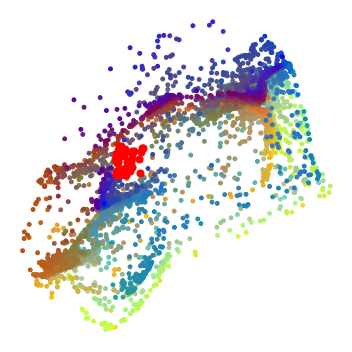

In [14]:
x = data[:, 0]
y = data[:, 1]
plt. clf()
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5), tight_layout=True)
ax.scatter(x, y, s=15, c=c, marker='o', cmap=maps[1], alpha=1)

plt.axis('off')

Adj = A
x = selected[:, 0]
y = selected[:, 1]
ax.scatter(x, y, s=50, c='red', marker='o', cmap=maps[1], alpha=1)

plt.savefig(r"D:\projects\SF\toy_example\results\局部邻接矩阵\{}.pdf".format(data_id), dpi=500, bbox_inches='tight', pad_inches=0)
plt.show()

# 在相同的位置上画邻接矩阵

Sparsity of A(0 is empty): 53.88260977140826 %


<Figure size 432x288 with 0 Axes>

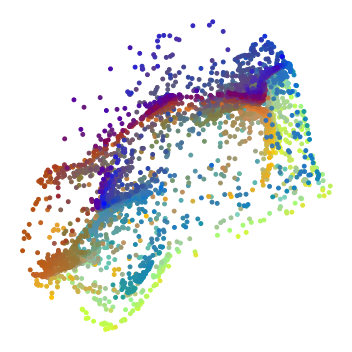

Sparsity of A(0 is empty): 54.07817790089259 %


<Figure size 432x288 with 0 Axes>

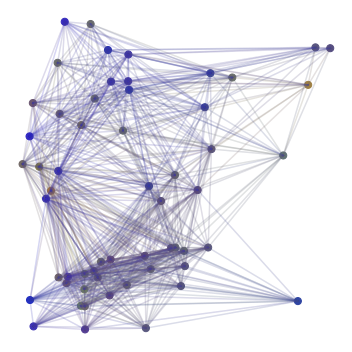

In [18]:
data_id = 5
data_path = r"D:\projects\SF\toy_example\results\YC02_rel\asd\YC02_rel_{}.csv".format(data_id)

data = np.loadtxt(fname=data_path, delimiter=",")

from scipy.spatial.distance import cdist
z = data
Dis = cdist(z, z, p=2)  # distance matrix
m = Dis.mean()

# 不带权A
A = np.eye(Dis.shape[0])
# A[Dis < self.varrho] = 1
A[Dis < m] = 1
remain_persent = (A.sum() / (A.shape[0] * A.shape[1])).item()
print("Sparsity of A(0 is empty):", remain_persent * 100, "%")

x = data[:, 0]
y = data[:, 1]
plt. clf()
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5), tight_layout=True)
plt.axis('off')

ax.scatter(x, y, s=15, c=c, marker='o', cmap=maps[1], alpha=1)
plt.savefig(r"D:\projects\SF\toy_example\results\局部邻接矩阵\{}.pdf".format(data_id), dpi=500, bbox_inches='tight', pad_inches=0)
plt.show()

# 记录 idx 在第三维
idx = np.arange(data.shape[0]).reshape(-1, 1)
iddata = np.concatenate((data, idx), 1)

n = 10

x_max = data[:, 0].max()
x_min = data[:, 0].min()
y_max = data[:, 1].max()
y_min = data[:, 1].min()
x_in = (x_max - x_min) / n
y_in = (y_max - y_min) / n
x_list = np.arange(x_min, x_max, x_in)
y_list = np.arange(y_min, y_max, y_in)

# 全体分块
for i in range(n):
    for j in range(n):
        temp = iddata
        temp = temp[x_list[i] < temp[:, 0]]
        if i < n - 1: temp = temp[temp[:, 0] < x_list[i + 1]]
        temp = temp[y_list[j] < temp[:, 1]]
        if j < n - 1: temp = temp[temp[:, 1] < y_list[j + 1]]
        
        if temp.shape[0] > 100 and temp.shape[0]< 300:
            break
    if temp.shape[0] > 100:
        break

# 选择坐标 ij 的块
i, j = 3, 5
temp = iddata
temp = temp[x_list[i] < temp[:, 0]]
if i < n - 1: temp = temp[temp[:, 0] < x_list[i + 1]]
temp = temp[y_list[j] < temp[:, 1]]
if j < n - 1: temp = temp[temp[:, 1] < y_list[j + 1]]
temp.shape[0]

# 获取选择出来的点的ID, 非常重要
crop = temp[:, 2]

# 从原始数据中截取ID list
li = []
c_list = []
for i in crop:
    li.append(data[int(i), :])
    c_list.append(c[int(i), :])
selected = np.array(li)

# 计算邻接矩阵
Dis = cdist(selected, selected, p=2)  # distance matrix

A = np.eye(Dis.shape[0])
# A[Dis < self.varrho] = 1
m = Dis.mean()
A[Dis < m] = 1

remain_persent = (A.sum() / (A.shape[0] * A.shape[1])).item()
print("Sparsity of A(0 is empty):", remain_persent * 100, "%")

# 画图和邻接矩阵
Adj = A
x = selected[:, 0]
y = selected[:, 1]
plt. clf()
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5), tight_layout=True)
plt.axis('off')

ax.scatter(x, y, s=50, c=c_list, marker='o', cmap=maps[1], alpha=1)

for i in range(Adj.shape[0]):
    for j in range(Adj.shape[1]):
        if Adj[i][j] == 1:
            plt.plot([x[i], x[j]], [y[i], y[j]], color=c_list[i], alpha=0.1)
plt.savefig(r"D:\projects\SF\toy_example\results\局部邻接矩阵\{}_adj.pdf".format(data_id), dpi=500, bbox_inches='tight', pad_inches=0)
plt.show()

Sparsity of A(0 is empty): 51.50555653116542 %


<Figure size 432x288 with 0 Axes>

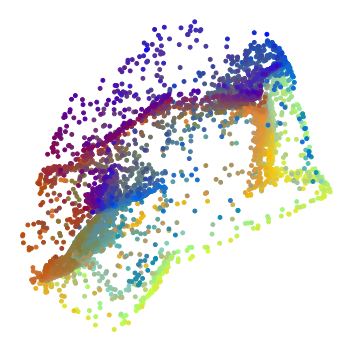

Sparsity of A(0 is empty): 50.788158400615146 %


<Figure size 432x288 with 0 Axes>

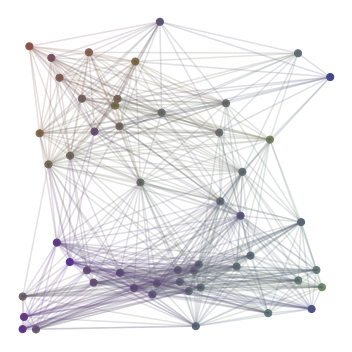

In [15]:
data_id = 6
data_path = r"D:\projects\SF\toy_example\results\YC02_rel\asd\YC02_rel_{}.csv".format(data_id)

data = np.loadtxt(fname=data_path, delimiter=",")

from scipy.spatial.distance import cdist
z = data
Dis = cdist(z, z, p=2)  # distance matrix
m = Dis.mean()

# 不带权A
A = np.eye(Dis.shape[0])
# A[Dis < self.varrho] = 1
A[Dis < m] = 1
remain_persent = (A.sum() / (A.shape[0] * A.shape[1])).item()
print("Sparsity of A(0 is empty):", remain_persent * 100, "%")

x = data[:, 0]
y = data[:, 1]
plt. clf()
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5), tight_layout=True)
plt.axis('off')

ax.scatter(x, y, s=15, c=c, marker='o', cmap=maps[1], alpha=1)
plt.savefig(r"D:\projects\SF\toy_example\results\局部邻接矩阵\{}.pdf".format(data_id), dpi=500, bbox_inches='tight', pad_inches=0)
plt.show()

# 记录 idx 在第三维
idx = np.arange(data.shape[0]).reshape(-1, 1)
iddata = np.concatenate((data, idx), 1)

n = 10

x_max = data[:, 0].max()
x_min = data[:, 0].min()
y_max = data[:, 1].max()
y_min = data[:, 1].min()
x_in = (x_max - x_min) / n
y_in = (y_max - y_min) / n
x_list = np.arange(x_min, x_max, x_in)
y_list = np.arange(y_min, y_max, y_in)

# 全体分块
for i in range(n):
    for j in range(n):
        temp = iddata
        temp = temp[x_list[i] < temp[:, 0]]
        if i < n - 1: temp = temp[temp[:, 0] < x_list[i + 1]]
        temp = temp[y_list[j] < temp[:, 1]]
        if j < n - 1: temp = temp[temp[:, 1] < y_list[j + 1]]
        
        if temp.shape[0] > 100 and temp.shape[0]< 300:
            break
    if temp.shape[0] > 100:
        break

# 选择坐标 ij 的块
i, j = 3, 5
temp = iddata
temp = temp[x_list[i] < temp[:, 0]]
if i < n - 1: temp = temp[temp[:, 0] < x_list[i + 1]]
temp = temp[y_list[j] < temp[:, 1]]
if j < n - 1: temp = temp[temp[:, 1] < y_list[j + 1]]
temp.shape[0]

# 获取选择出来的点的ID, 非常重要
crop = temp[:, 2]

# 从原始数据中截取ID list
li = []
c_list = []
for i in crop:
    li.append(data[int(i), :])
    c_list.append(c[int(i), :])
selected = np.array(li)

# 计算邻接矩阵
Dis = cdist(selected, selected, p=2)  # distance matrix

A = np.eye(Dis.shape[0])
# A[Dis < self.varrho] = 1
m = Dis.mean()
A[Dis < m] = 1

remain_persent = (A.sum() / (A.shape[0] * A.shape[1])).item()
print("Sparsity of A(0 is empty):", remain_persent * 100, "%")

# 画图和邻接矩阵
Adj = A
x = selected[:, 0]
y = selected[:, 1]
plt. clf()
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5), tight_layout=True)
plt.axis('off')

ax.scatter(x, y, s=50, c=c_list, marker='o', cmap=maps[1], alpha=1)

for i in range(Adj.shape[0]):
    for j in range(Adj.shape[1]):
        if Adj[i][j] == 1:
            plt.plot([x[i], x[j]], [y[i], y[j]], color=c_list[i], alpha=0.1)
plt.savefig(r"D:\projects\SF\toy_example\results\局部邻接矩阵\{}_adj.pdf".format(data_id), dpi=500, bbox_inches='tight', pad_inches=0)
plt.show()

Sparsity of A(0 is empty): 52.1138810349408 %


<Figure size 432x288 with 0 Axes>

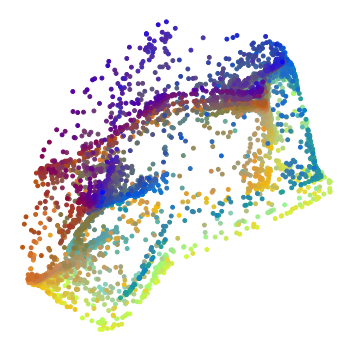

Sparsity of A(0 is empty): 58.59375 %


<Figure size 432x288 with 0 Axes>

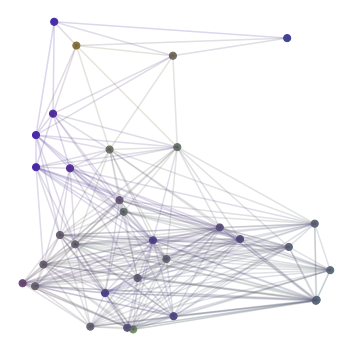

In [16]:
data_id = 7
data_path = r"D:\projects\SF\toy_example\results\YC02_rel\asd\YC02_rel_{}.csv".format(data_id)

data = np.loadtxt(fname=data_path, delimiter=",")

from scipy.spatial.distance import cdist
z = data
Dis = cdist(z, z, p=2)  # distance matrix
m = Dis.mean()

# 不带权A
A = np.eye(Dis.shape[0])
# A[Dis < self.varrho] = 1
A[Dis < m] = 1
remain_persent = (A.sum() / (A.shape[0] * A.shape[1])).item()
print("Sparsity of A(0 is empty):", remain_persent * 100, "%")

x = data[:, 0]
y = data[:, 1]
plt. clf()
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5), tight_layout=True)
plt.axis('off')

ax.scatter(x, y, s=15, c=c, marker='o', cmap=maps[1], alpha=1)
plt.savefig(r"D:\projects\SF\toy_example\results\局部邻接矩阵\{}.pdf".format(data_id), dpi=500, bbox_inches='tight', pad_inches=0)
plt.show()

# 记录 idx 在第三维
idx = np.arange(data.shape[0]).reshape(-1, 1)
iddata = np.concatenate((data, idx), 1)

n = 10

x_max = data[:, 0].max()
x_min = data[:, 0].min()
y_max = data[:, 1].max()
y_min = data[:, 1].min()
x_in = (x_max - x_min) / n
y_in = (y_max - y_min) / n
x_list = np.arange(x_min, x_max, x_in)
y_list = np.arange(y_min, y_max, y_in)

# 全体分块
for i in range(n):
    for j in range(n):
        temp = iddata
        temp = temp[x_list[i] < temp[:, 0]]
        if i < n - 1: temp = temp[temp[:, 0] < x_list[i + 1]]
        temp = temp[y_list[j] < temp[:, 1]]
        if j < n - 1: temp = temp[temp[:, 1] < y_list[j + 1]]
        
        if temp.shape[0] > 100 and temp.shape[0]< 300:
            break
    if temp.shape[0] > 100:
        break

# 选择坐标 ij 的块
i, j = 3, 5
temp = iddata
temp = temp[x_list[i] < temp[:, 0]]
if i < n - 1: temp = temp[temp[:, 0] < x_list[i + 1]]
temp = temp[y_list[j] < temp[:, 1]]
if j < n - 1: temp = temp[temp[:, 1] < y_list[j + 1]]
temp.shape[0]

# 获取选择出来的点的ID, 非常重要
crop = temp[:, 2]

# 从原始数据中截取ID list
li = []
c_list = []
for i in crop:
    li.append(data[int(i), :])
    c_list.append(c[int(i), :])
selected = np.array(li)

# 计算邻接矩阵
Dis = cdist(selected, selected, p=2)  # distance matrix

A = np.eye(Dis.shape[0])
# A[Dis < self.varrho] = 1
m = Dis.mean()
A[Dis < m] = 1

remain_persent = (A.sum() / (A.shape[0] * A.shape[1])).item()
print("Sparsity of A(0 is empty):", remain_persent * 100, "%")

# 画图和邻接矩阵
Adj = A
x = selected[:, 0]
y = selected[:, 1]
plt. clf()
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5), tight_layout=True)
plt.axis('off')

ax.scatter(x, y, s=50, c=c_list, marker='o', cmap=maps[1], alpha=1)

for i in range(Adj.shape[0]):
    for j in range(Adj.shape[1]):
        if Adj[i][j] == 1:
            plt.plot([x[i], x[j]], [y[i], y[j]], color=c_list[i], alpha=0.1)
plt.savefig(r"D:\projects\SF\toy_example\results\局部邻接矩阵\{}_adj.pdf".format(data_id), dpi=500, bbox_inches='tight', pad_inches=0)
plt.show()

Sparsity of A(0 is empty): 51.66125578424082 %


<Figure size 432x288 with 0 Axes>

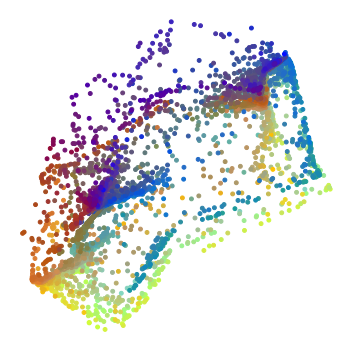

Sparsity of A(0 is empty): 50.81481481481481 %


<Figure size 432x288 with 0 Axes>

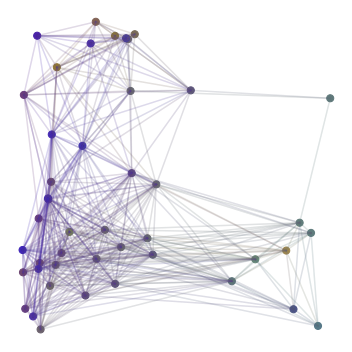

In [17]:
data_id = 8
data_path = r"D:\projects\SF\toy_example\results\YC02_rel\asd\YC02_rel_{}.csv".format(data_id)

data = np.loadtxt(fname=data_path, delimiter=",")

from scipy.spatial.distance import cdist
z = data
Dis = cdist(z, z, p=2)  # distance matrix
m = Dis.mean()

# 不带权A
A = np.eye(Dis.shape[0])
# A[Dis < self.varrho] = 1
A[Dis < m] = 1
remain_persent = (A.sum() / (A.shape[0] * A.shape[1])).item()
print("Sparsity of A(0 is empty):", remain_persent * 100, "%")

x = data[:, 0]
y = data[:, 1]
plt. clf()
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5), tight_layout=True)
plt.axis('off')

ax.scatter(x, y, s=15, c=c, marker='o', cmap=maps[1], alpha=1)
plt.savefig(r"D:\projects\SF\toy_example\results\局部邻接矩阵\{}.pdf".format(data_id), dpi=500, bbox_inches='tight', pad_inches=0)
plt.show()

# 记录 idx 在第三维
idx = np.arange(data.shape[0]).reshape(-1, 1)
iddata = np.concatenate((data, idx), 1)

n = 10

x_max = data[:, 0].max()
x_min = data[:, 0].min()
y_max = data[:, 1].max()
y_min = data[:, 1].min()
x_in = (x_max - x_min) / n
y_in = (y_max - y_min) / n
x_list = np.arange(x_min, x_max, x_in)
y_list = np.arange(y_min, y_max, y_in)

# 全体分块
for i in range(n):
    for j in range(n):
        temp = iddata
        temp = temp[x_list[i] < temp[:, 0]]
        if i < n - 1: temp = temp[temp[:, 0] < x_list[i + 1]]
        temp = temp[y_list[j] < temp[:, 1]]
        if j < n - 1: temp = temp[temp[:, 1] < y_list[j + 1]]
        
        if temp.shape[0] > 100 and temp.shape[0]< 300:
            break
    if temp.shape[0] > 100:
        break

# 选择坐标 ij 的块
i, j = 3, 5
temp = iddata
temp = temp[x_list[i] < temp[:, 0]]
if i < n - 1: temp = temp[temp[:, 0] < x_list[i + 1]]
temp = temp[y_list[j] < temp[:, 1]]
if j < n - 1: temp = temp[temp[:, 1] < y_list[j + 1]]
temp.shape[0]

# 获取选择出来的点的ID, 非常重要
crop = temp[:, 2]

# 从原始数据中截取ID list
li = []
c_list = []
for i in crop:
    li.append(data[int(i), :])
    c_list.append(c[int(i), :])
selected = np.array(li)

# 计算邻接矩阵
Dis = cdist(selected, selected, p=2)  # distance matrix

A = np.eye(Dis.shape[0])
# A[Dis < self.varrho] = 1
m = Dis.mean()
A[Dis < m] = 1

remain_persent = (A.sum() / (A.shape[0] * A.shape[1])).item()
print("Sparsity of A(0 is empty):", remain_persent * 100, "%")

# 画图和邻接矩阵
Adj = A
x = selected[:, 0]
y = selected[:, 1]
plt. clf()
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5), tight_layout=True)
plt.axis('off')

ax.scatter(x, y, s=50, c=c_list, marker='o', cmap=maps[1], alpha=1)

for i in range(Adj.shape[0]):
    for j in range(Adj.shape[1]):
        if Adj[i][j] == 1:
            plt.plot([x[i], x[j]], [y[i], y[j]], color=c_list[i], alpha=0.1)
plt.savefig(r"D:\projects\SF\toy_example\results\局部邻接矩阵\{}_adj.pdf".format(data_id), dpi=500, bbox_inches='tight', pad_inches=0)
plt.show()

用同样的选择出来的id在另一张图上画图

<Figure size 432x288 with 0 Axes>

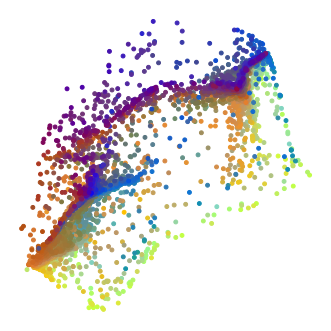

In [201]:
data_id = 12
data_path = r"D:\projects\SF\toy_example\results\YC02_rel\asd\YC02_rel_{}.csv".format(data_id)

data = np.loadtxt(fname=data_path, delimiter=",")
x = data[:, 0]
y = data[:, 1]
plt. clf()
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5), tight_layout=True)
plt.axis('off')

ax.scatter(x, y, s=15, c=c, marker='o', cmap=maps[1], alpha=1)
plt.savefig(r"D:\projects\SF\toy_example\results\局部邻接矩阵\{}.pdf".format(data_id), dpi=500, bbox_inches='tight', pad_inches=0)
plt.show()

In [202]:
# 从原始数据中截取ID list
li = []
c_list = []
for i in crop:
    li.append(data[int(i), :])
    c_list.append(c[int(i), :])
selected = np.array(li)

# 计算邻接矩阵
Dis = cdist(selected, selected, p=2)  # distance matrix

A = np.eye(Dis.shape[0])
# A[Dis < self.varrho] = 1
m = Dis.mean()
A[Dis < m] = 1

remain_persent = (A.sum() / (A.shape[0] * A.shape[1])).item()
print("Sparsity of A(0 is empty):", remain_persent * 100, "%")

Sparsity of A(0 is empty): 54.69375192366882 %


<Figure size 432x288 with 0 Axes>

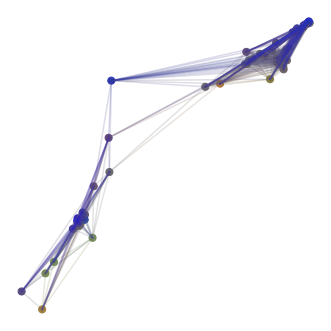

In [203]:
# 画图和邻接矩阵
Adj = A
x = selected[:, 0]
y = selected[:, 1]
plt. clf()
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5), tight_layout=True)
plt.axis('off')

ax.scatter(x, y, s=50, c=c_list, marker='o', cmap=maps[1], alpha=1)

for i in range(Adj.shape[0]):
    for j in range(Adj.shape[1]):
        if Adj[i][j] == 1:
            plt.plot([x[i], x[j]], [y[i], y[j]], color=c_list[i], alpha=0.1)
plt.savefig(r"D:\projects\SF\toy_example\results\局部邻接矩阵\{}_adj.pdf".format(data_id), dpi=500, bbox_inches='tight', pad_inches=0)
plt.show()

Sparsity of A(0 is empty): 68.11326562019083 %


<Figure size 432x288 with 0 Axes>

<Figure size 360x360 with 0 Axes>

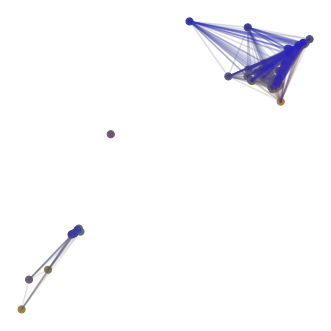

In [204]:
data_id = 13
data_path = r"D:\projects\SF\toy_example\results\YC02_rel\asd\YC02_rel_{}.csv".format(data_id)

data = np.loadtxt(fname=data_path, delimiter=",")
x = data[:, 0]
y = data[:, 1]
plt. clf()
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5), tight_layout=True)
plt.axis('off')

ax.scatter(x, y, s=15, c=c, marker='o', cmap=maps[1], alpha=1)
plt.savefig(r"D:\projects\SF\toy_example\results\局部邻接矩阵\{}.pdf".format(data_id), dpi=500, bbox_inches='tight', pad_inches=0)

# 从原始数据中截取ID list
li = []
c_list = []
for i in crop:
    li.append(data[int(i), :])
    c_list.append(c[int(i), :])
selected = np.array(li)

# 计算邻接矩阵
Dis = cdist(selected, selected, p=2)  # distance matrix

A = np.eye(Dis.shape[0])
# A[Dis < self.varrho] = 1
m = Dis.mean()
A[Dis < m] = 1

remain_persent = (A.sum() / (A.shape[0] * A.shape[1])).item()
print("Sparsity of A(0 is empty):", remain_persent * 100, "%")

# 画图和邻接矩阵
Adj = A
x = selected[:, 0]
y = selected[:, 1]
plt. clf()
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5), tight_layout=True)
plt.axis('off')

ax.scatter(x, y, s=50, c=c_list, marker='o', cmap=maps[1], alpha=1)

for i in range(Adj.shape[0]):
    for j in range(Adj.shape[1]):
        if Adj[i][j] == 1:
            plt.plot([x[i], x[j]], [y[i], y[j]], color=c_list[i], alpha=0.1)
plt.savefig(r"D:\projects\SF\toy_example\results\局部邻接矩阵\{}_adj.pdf".format(data_id), dpi=500, bbox_inches='tight', pad_inches=0)
plt.show()

Sparsity of A(0 is empty): 54.201292705447834 %


<Figure size 432x288 with 0 Axes>

<Figure size 360x360 with 0 Axes>

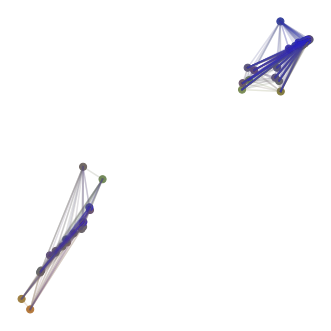

In [205]:
data_id = 14
data_path = r"D:\projects\SF\toy_example\results\YC02_rel\asd\YC02_rel_{}.csv".format(data_id)

data = np.loadtxt(fname=data_path, delimiter=",")
x = data[:, 0]
y = data[:, 1]
plt. clf()
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5), tight_layout=True)
plt.axis('off')

ax.scatter(x, y, s=15, c=c, marker='o', cmap=maps[1], alpha=1)
plt.savefig(r"D:\projects\SF\toy_example\results\局部邻接矩阵\{}.pdf".format(data_id), dpi=500, bbox_inches='tight', pad_inches=0)

# 从原始数据中截取ID list
li = []
c_list = []
for i in crop:
    li.append(data[int(i), :])
    c_list.append(c[int(i), :])
selected = np.array(li)

# 计算邻接矩阵
Dis = cdist(selected, selected, p=2)  # distance matrix

A = np.eye(Dis.shape[0])
# A[Dis < self.varrho] = 1
m = Dis.mean()
A[Dis < m] = 1

remain_persent = (A.sum() / (A.shape[0] * A.shape[1])).item()
print("Sparsity of A(0 is empty):", remain_persent * 100, "%")

# 画图和邻接矩阵
Adj = A
x = selected[:, 0]
y = selected[:, 1]
plt. clf()
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5), tight_layout=True)
plt.axis('off')

ax.scatter(x, y, s=50, c=c_list, marker='o', cmap=maps[1], alpha=1)

for i in range(Adj.shape[0]):
    for j in range(Adj.shape[1]):
        if Adj[i][j] == 1:
            plt.plot([x[i], x[j]], [y[i], y[j]], color=c_list[i], alpha=0.1)
plt.savefig(r"D:\projects\SF\toy_example\results\局部邻接矩阵\{}_adj.pdf".format(data_id), dpi=500, bbox_inches='tight', pad_inches=0)
plt.show()

Sparsity of A(0 is empty): 56.232686980609415 %


<Figure size 432x288 with 0 Axes>

<Figure size 360x360 with 0 Axes>

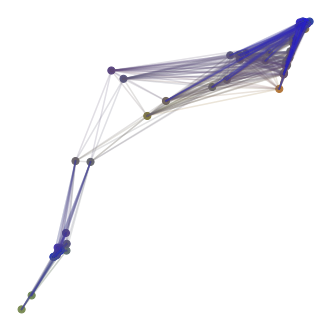

In [206]:
data_id = 20
data_path = r"D:\projects\SF\toy_example\results\YC02_rel\asd\YC02_rel_{}.csv".format(data_id)

data = np.loadtxt(fname=data_path, delimiter=",")
x = data[:, 0]
y = data[:, 1]
plt. clf()
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5), tight_layout=True)
plt.axis('off')

ax.scatter(x, y, s=15, c=c, marker='o', cmap=maps[1], alpha=1)
plt.savefig(r"D:\projects\SF\toy_example\results\局部邻接矩阵\{}.pdf".format(data_id), dpi=500, bbox_inches='tight', pad_inches=0)

# 从原始数据中截取ID list
li = []
c_list = []
for i in crop:
    li.append(data[int(i), :])
    c_list.append(c[int(i), :])
selected = np.array(li)

# 计算邻接矩阵
Dis = cdist(selected, selected, p=2)  # distance matrix

A = np.eye(Dis.shape[0])
# A[Dis < self.varrho] = 1
m = Dis.mean()
A[Dis < m] = 1

remain_persent = (A.sum() / (A.shape[0] * A.shape[1])).item()
print("Sparsity of A(0 is empty):", remain_persent * 100, "%")

# 画图和邻接矩阵
Adj = A
x = selected[:, 0]
y = selected[:, 1]
plt. clf()
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5), tight_layout=True)
plt.axis('off')

ax.scatter(x, y, s=50, c=c_list, marker='o', cmap=maps[1], alpha=1)

for i in range(Adj.shape[0]):
    for j in range(Adj.shape[1]):
        if Adj[i][j] == 1:
            plt.plot([x[i], x[j]], [y[i], y[j]], color=c_list[i], alpha=0.1)
plt.savefig(r"D:\projects\SF\toy_example\results\局部邻接矩阵\{}_adj.pdf".format(data_id), dpi=500, bbox_inches='tight', pad_inches=0)
plt.show()

Sparsity of A(0 is empty): 52.47768544167436 %


<Figure size 432x288 with 0 Axes>

<Figure size 360x360 with 0 Axes>

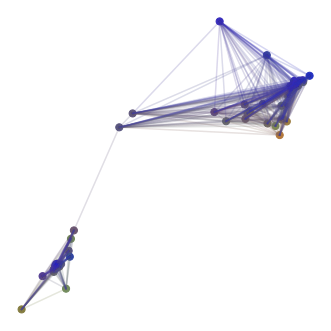

In [207]:
data_id = 21
data_path = r"D:\projects\SF\toy_example\results\YC02_rel\asd\YC02_rel_{}.csv".format(data_id)

data = np.loadtxt(fname=data_path, delimiter=",")
x = data[:, 0]
y = data[:, 1]
plt. clf()
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5), tight_layout=True)
plt.axis('off')

ax.scatter(x, y, s=15, c=c, marker='o', cmap=maps[1], alpha=1)
plt.savefig(r"D:\projects\SF\toy_example\results\局部邻接矩阵\{}.pdf".format(data_id), dpi=500, bbox_inches='tight', pad_inches=0)

# 从原始数据中截取ID list
li = []
c_list = []
for i in crop:
    li.append(data[int(i), :])
    c_list.append(c[int(i), :])
selected = np.array(li)

# 计算邻接矩阵
Dis = cdist(selected, selected, p=2)  # distance matrix

A = np.eye(Dis.shape[0])
# A[Dis < self.varrho] = 1
m = Dis.mean()
A[Dis < m] = 1

remain_persent = (A.sum() / (A.shape[0] * A.shape[1])).item()
print("Sparsity of A(0 is empty):", remain_persent * 100, "%")

# 画图和邻接矩阵
Adj = A
x = selected[:, 0]
y = selected[:, 1]
plt. clf()
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5), tight_layout=True)
plt.axis('off')

ax.scatter(x, y, s=50, c=c_list, marker='o', cmap=maps[1], alpha=1)

for i in range(Adj.shape[0]):
    for j in range(Adj.shape[1]):
        if Adj[i][j] == 1:
            plt.plot([x[i], x[j]], [y[i], y[j]], color=c_list[i], alpha=0.1)
plt.savefig(r"D:\projects\SF\toy_example\results\局部邻接矩阵\{}_adj.pdf".format(data_id), dpi=500, bbox_inches='tight', pad_inches=0)
plt.show()

Sparsity of A(0 is empty): 51.30809479839951 %


<Figure size 432x288 with 0 Axes>

<Figure size 360x360 with 0 Axes>

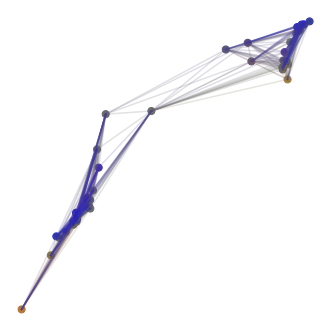

In [208]:
data_id = 22
data_path = r"D:\projects\SF\toy_example\results\YC02_rel\asd\YC02_rel_{}.csv".format(data_id)

data = np.loadtxt(fname=data_path, delimiter=",")
x = data[:, 0]
y = data[:, 1]
plt. clf()
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5), tight_layout=True)
plt.axis('off')

ax.scatter(x, y, s=15, c=c, marker='o', cmap=maps[1], alpha=1)
plt.savefig(r"D:\projects\SF\toy_example\results\局部邻接矩阵\{}.pdf".format(data_id), dpi=500, bbox_inches='tight', pad_inches=0)

# 从原始数据中截取ID list
li = []
c_list = []
for i in crop:
    li.append(data[int(i), :])
    c_list.append(c[int(i), :])
selected = np.array(li)

# 计算邻接矩阵
Dis = cdist(selected, selected, p=2)  # distance matrix

A = np.eye(Dis.shape[0])
# A[Dis < self.varrho] = 1
m = Dis.mean()
A[Dis < m] = 1

remain_persent = (A.sum() / (A.shape[0] * A.shape[1])).item()
print("Sparsity of A(0 is empty):", remain_persent * 100, "%")

# 画图和邻接矩阵
Adj = A
x = selected[:, 0]
y = selected[:, 1]
plt. clf()
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5), tight_layout=True)
plt.axis('off')

ax.scatter(x, y, s=50, c=c_list, marker='o', cmap=maps[1], alpha=1)

for i in range(Adj.shape[0]):
    for j in range(Adj.shape[1]):
        if Adj[i][j] == 1:
            plt.plot([x[i], x[j]], [y[i], y[j]], color=c_list[i], alpha=0.1)
plt.savefig(r"D:\projects\SF\toy_example\results\局部邻接矩阵\{}_adj.pdf".format(data_id), dpi=500, bbox_inches='tight', pad_inches=0)
plt.show()

Sparsity of A(0 is empty): 56.90981840566328 %


<Figure size 432x288 with 0 Axes>

<Figure size 360x360 with 0 Axes>

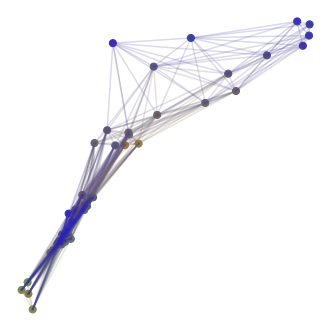

In [212]:
data_id = 32
data_path = r"D:\projects\SF\toy_example\results\YC02_rel\asd\YC02_rel_{}.csv".format(data_id)

data = np.loadtxt(fname=data_path, delimiter=",")
x = data[:, 0]
y = data[:, 1]
plt. clf()
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5), tight_layout=True)
plt.axis('off')

ax.scatter(x, y, s=15, c=c, marker='o', cmap=maps[1], alpha=1)
plt.savefig(r"D:\projects\SF\toy_example\results\局部邻接矩阵\{}.pdf".format(data_id), dpi=500, bbox_inches='tight', pad_inches=0)

# 从原始数据中截取ID list
li = []
c_list = []
for i in crop:
    li.append(data[int(i), :])
    c_list.append(c[int(i), :])
selected = np.array(li)

# 计算邻接矩阵
Dis = cdist(selected, selected, p=2)  # distance matrix

A = np.eye(Dis.shape[0])
# A[Dis < self.varrho] = 1
m = Dis.mean()
A[Dis < m] = 1

remain_persent = (A.sum() / (A.shape[0] * A.shape[1])).item()
print("Sparsity of A(0 is empty):", remain_persent * 100, "%")

# 画图和邻接矩阵
Adj = A
x = selected[:, 0]
y = selected[:, 1]
plt. clf()
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5), tight_layout=True)
plt.axis('off')

ax.scatter(x, y, s=50, c=c_list, marker='o', cmap=maps[1], alpha=1)

for i in range(Adj.shape[0]):
    for j in range(Adj.shape[1]):
        if Adj[i][j] == 1:
            plt.plot([x[i], x[j]], [y[i], y[j]], color=c_list[i], alpha=0.1)
plt.savefig(r"D:\projects\SF\toy_example\results\局部邻接矩阵\{}_adj.pdf".format(data_id), dpi=500, bbox_inches='tight', pad_inches=0)
plt.show()

Sparsity of A(0 is empty): 55.18621114188981 %


<Figure size 432x288 with 0 Axes>

<Figure size 360x360 with 0 Axes>

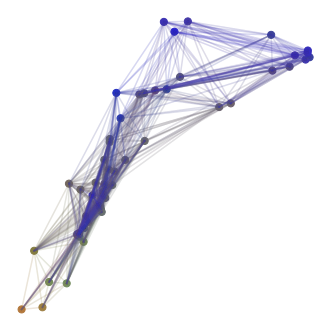

In [210]:
data_id = 33
data_path = r"D:\projects\SF\toy_example\results\YC02_rel\asd\YC02_rel_{}.csv".format(data_id)

data = np.loadtxt(fname=data_path, delimiter=",")
x = data[:, 0]
y = data[:, 1]
plt. clf()
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5), tight_layout=True)
plt.axis('off')

ax.scatter(x, y, s=15, c=c, marker='o', cmap=maps[1], alpha=1)
plt.savefig(r"D:\projects\SF\toy_example\results\局部邻接矩阵\{}.pdf".format(data_id), dpi=500, bbox_inches='tight', pad_inches=0)

# 从原始数据中截取ID list
li = []
c_list = []
for i in crop:
    li.append(data[int(i), :])
    c_list.append(c[int(i), :])
selected = np.array(li)

# 计算邻接矩阵
Dis = cdist(selected, selected, p=2)  # distance matrix

A = np.eye(Dis.shape[0])
# A[Dis < self.varrho] = 1
m = Dis.mean()
A[Dis < m] = 1

remain_persent = (A.sum() / (A.shape[0] * A.shape[1])).item()
print("Sparsity of A(0 is empty):", remain_persent * 100, "%")

# 画图和邻接矩阵
Adj = A
x = selected[:, 0]
y = selected[:, 1]
plt. clf()
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5), tight_layout=True)
plt.axis('off')

ax.scatter(x, y, s=50, c=c_list, marker='o', cmap=maps[1], alpha=1)

for i in range(Adj.shape[0]):
    for j in range(Adj.shape[1]):
        if Adj[i][j] == 1:
            plt.plot([x[i], x[j]], [y[i], y[j]], color=c_list[i], alpha=0.1)
plt.savefig(r"D:\projects\SF\toy_example\results\局部邻接矩阵\{}_adj.pdf".format(data_id), dpi=500, bbox_inches='tight', pad_inches=0)
plt.show()

Sparsity of A(0 is empty): 51.985226223453374 %


<Figure size 432x288 with 0 Axes>

<Figure size 360x360 with 0 Axes>

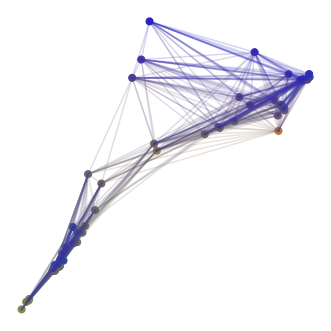

In [211]:
data_id = 34
data_path = r"D:\projects\SF\toy_example\results\YC02_rel\asd\YC02_rel_{}.csv".format(data_id)

data = np.loadtxt(fname=data_path, delimiter=",")
x = data[:, 0]
y = data[:, 1]
plt. clf()
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5), tight_layout=True)
plt.axis('off')

ax.scatter(x, y, s=15, c=c, marker='o', cmap=maps[1], alpha=1)
plt.savefig(r"D:\projects\SF\toy_example\results\局部邻接矩阵\{}.pdf".format(data_id), dpi=500, bbox_inches='tight', pad_inches=0)

# 从原始数据中截取ID list
li = []
c_list = []
for i in crop:
    li.append(data[int(i), :])
    c_list.append(c[int(i), :])
selected = np.array(li)

# 计算邻接矩阵
Dis = cdist(selected, selected, p=2)  # distance matrix

A = np.eye(Dis.shape[0])
# A[Dis < self.varrho] = 1
m = Dis.mean()
A[Dis < m] = 1

remain_persent = (A.sum() / (A.shape[0] * A.shape[1])).item()
print("Sparsity of A(0 is empty):", remain_persent * 100, "%")

# 画图和邻接矩阵
Adj = A
x = selected[:, 0]
y = selected[:, 1]
plt. clf()
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5), tight_layout=True)
plt.axis('off')

ax.scatter(x, y, s=50, c=c_list, marker='o', cmap=maps[1], alpha=1)

for i in range(Adj.shape[0]):
    for j in range(Adj.shape[1]):
        if Adj[i][j] == 1:
            plt.plot([x[i], x[j]], [y[i], y[j]], color=c_list[i], alpha=0.1)
plt.savefig(r"D:\projects\SF\toy_example\results\局部邻接矩阵\{}_adj.pdf".format(data_id), dpi=500, bbox_inches='tight', pad_inches=0)
plt.show()

Sparsity of A(0 is empty): 52.8470298553401 %


<Figure size 432x288 with 0 Axes>

<Figure size 360x360 with 0 Axes>

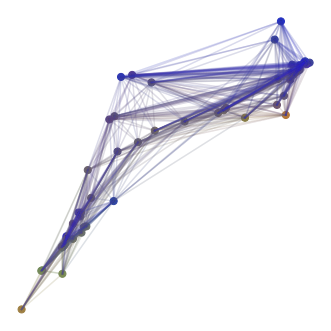

In [209]:
data_id = 35
data_path = r"D:\projects\SF\toy_example\results\YC02_rel\asd\YC02_rel_{}.csv".format(data_id)

data = np.loadtxt(fname=data_path, delimiter=",")
x = data[:, 0]
y = data[:, 1]
plt. clf()
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5), tight_layout=True)
plt.axis('off')

ax.scatter(x, y, s=15, c=c, marker='o', cmap=maps[1], alpha=1)
plt.savefig(r"D:\projects\SF\toy_example\results\局部邻接矩阵\{}.pdf".format(data_id), dpi=500, bbox_inches='tight', pad_inches=0)

# 从原始数据中截取ID list
li = []
c_list = []
for i in crop:
    li.append(data[int(i), :])
    c_list.append(c[int(i), :])
selected = np.array(li)

# 计算邻接矩阵
Dis = cdist(selected, selected, p=2)  # distance matrix

A = np.eye(Dis.shape[0])
# A[Dis < self.varrho] = 1
m = Dis.mean()
A[Dis < m] = 1

remain_persent = (A.sum() / (A.shape[0] * A.shape[1])).item()
print("Sparsity of A(0 is empty):", remain_persent * 100, "%")

# 画图和邻接矩阵
Adj = A
x = selected[:, 0]
y = selected[:, 1]
plt. clf()
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5), tight_layout=True)
plt.axis('off')

ax.scatter(x, y, s=50, c=c_list, marker='o', cmap=maps[1], alpha=1)

for i in range(Adj.shape[0]):
    for j in range(Adj.shape[1]):
        if Adj[i][j] == 1:
            plt.plot([x[i], x[j]], [y[i], y[j]], color=c_list[i], alpha=0.1)
plt.savefig(r"D:\projects\SF\toy_example\results\局部邻接矩阵\{}_adj.pdf".format(data_id), dpi=500, bbox_inches='tight', pad_inches=0)
plt.show()